# Convolutional Neural Networks (CNN)

* Convolution
* Pooling

## Convolution
* https://en.wikipedia.org/wiki/Convolution

컨볼루션(합성곱)은 두 개의 함수를 연산해서 다른 함수를 만드는 연산의 일종이다. 일반적인 상관관계를 구하는 것과 다르게 두 함수 중 하나를 
$$f(x) \rightarrow f(-x)$$
로 반전시켜서 곱한다. 정확히는 다음의 수학적 정의를 따라 계산한다.
$$ (f * g)(x) = \int f(y) g(x-y) dy = \int f(x-y) g(y) dy.$$
아래 예시를 통해 위 식의 의미를 곰곰히 살펴보자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
f = [0,0,0,0,0.7,1,1,1,0.2,0.8,1,1,0.8,0,0,0]
g = [-1,0,1]

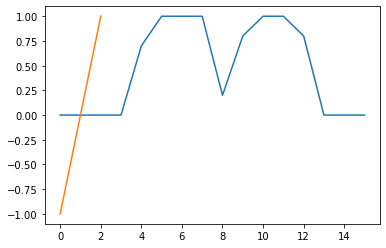

In [8]:
plt.plot(f)
plt.plot(g)

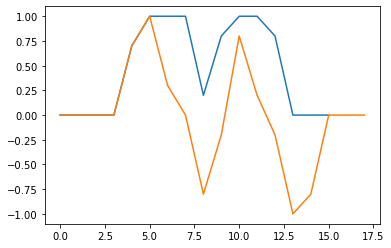

In [10]:
plt.plot(f)
plt.plot(np.convolve(f,[1,0,-1]),'-')

즉, 컨볼루션을 계산하면 커널 행렬(g)와 비슷한 패턴을 찾게 된다.

In [12]:
import torch
import torchvision

In [13]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
) # train
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
) # validation

In [26]:
from scipy import signal

X=train_data.data.data[1]
kernal = [[1,1,1],[0,0,0],[-1,-1,-1]]
conv = signal.convolve2d(X,kernal)

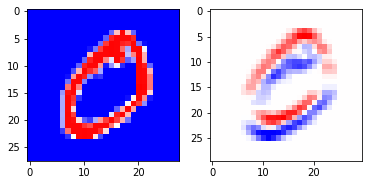

In [32]:
plt.subplot(1,2,1)
plt.imshow(X,cmap=plt.cm.bwr)
plt.subplot(1,2,2)
plt.imshow(conv,cmap=plt.cm.bwr)

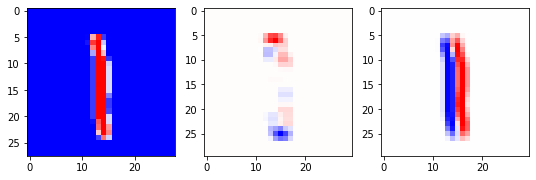

In [49]:
X=train_data.data.data[14]
kernal = [[1,1,1],[0,0,0],[-1,-1,-1]]
kernal_ver = [[-1,0,1],[-1,0,1],[-1,0,1]]
conv = signal.convolve2d(X,kernal)
conv_ver = signal.convolve2d(X,kernal_ver)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(X,cmap=plt.cm.bwr)
plt.subplot(1,3,2)
plt.imshow(conv,cmap=plt.cm.bwr)
plt.subplot(1,3,3)
plt.imshow(conv_ver,cmap=plt.cm.bwr)

## Pooling

풀링은 여러 개의 뉴런을 하나의 출력으로 바꾸는 과정을 말한다. 풀링 과정을 거치면 다른 스케일의 정보를 추출할 수 있다. 흔히 맥스 풀링, 평균 풀링 등이 사용된다.